# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from citipy import citipy
import datetime
today = datetime.date.today()

from api_key import weather_api_key

# Output File (CSV)
output_data_file = "cities.csv"

# Use these ranges of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_lngs = zip(lats, longs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
total_set_number = (len(cities) // 50) + 1

date = []
city = []
country = []
max_temp = []
humidity = []
lat = []
lon = []
cloudiness = []
wind_speed = []


failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial&q="


print('Beginning Data Retrieval')
print('------------------------------------------------')


for set_counter in range(total_set_number):
    

    try:    
        
      
        for record_counter in range(50):
            
          
            counter = set_counter * 50 + record_counter
          

            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

         
            try:
                
           
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
             
        
                date.append(weather_json["dt"])
                city.append(cities[counter])
                country.append(weather_json["sys"]["country"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])             
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                              
                         
        
            except KeyError:

                print('City not found. Skipping...')
                failed_counter += 1
            
        
            except:
                
                print('Oh no! Unexpected Error')
    

    except IndexError:
        
        break
        
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
------------------------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | simao
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | neiafu
Processing Record 9 of Set 1 | tuy hoa
Processing Record 10 of Set 1 | zaltan
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | general roca
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | lethem
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | alim
Processing Record 20 of Set 1 | abdulino
Processing Record 21 of Set 1 | przhevalskoye
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list = {'City': city,
             'Lat': lat,
             'Lng': lon,
             'Max Temp': max_temp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             'Wind Speed': wind_speed,
             'Country': country,
             'Date': date
            }
city_df = pd.DataFrame(city_list)

csv_path = 'cities.csv'
city_df.to_csv(csv_path)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,31.66,100,90,0.00,AR,1627298168
1,yulara,-25.2406,130.9889,57.04,28,6,0.00,AU,1627298170
2,bambous virieux,-20.3428,57.7575,75.45,69,75,13.80,MU,1627298172
3,simao,22.7886,100.9748,70.54,96,58,2.84,CN,1627298174
4,atuona,-9.8000,-139.0333,77.41,73,38,23.60,PF,1627298175
...,...,...,...,...,...,...,...,...,...
579,westport,41.1415,-73.3579,74.77,95,1,1.99,US,1627299357
580,los llanos de aridane,28.6585,-17.9182,73.13,84,20,14.97,ES,1627299359
581,manadhoo,5.7667,73.3833,81.57,78,99,13.09,MV,1627299361
582,beian,63.6559,9.5683,78.57,61,20,3.44,NO,1627299362


In [5]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,20.229677,17.042253,71.936250,68.676370,55.481164,8.109880,1.627299e+09
std,33.087806,89.632999,15.277163,23.647999,38.492204,5.835435,3.499917e+02
min,-54.800000,-175.200000,22.750000,5.000000,0.000000,0.000000,1.627298e+09
25%,-7.874300,-60.770800,61.660000,54.000000,17.000000,3.672500,1.627298e+09
50%,23.338400,17.639100,75.290000,75.000000,71.000000,6.880000,1.627299e+09
75%,49.003850,98.460525,81.377500,87.000000,91.250000,11.242500,1.627299e+09
max,78.218600,179.316700,113.450000,100.000000,100.000000,29.590000,1.627299e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_df.loc[city_df['Humidity'] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,31.66,100,90,0.00,AR,1627298168
1,yulara,-25.2406,130.9889,57.04,28,6,0.00,AU,1627298170
2,bambous virieux,-20.3428,57.7575,75.45,69,75,13.80,MU,1627298172
3,simao,22.7886,100.9748,70.54,96,58,2.84,CN,1627298174
4,atuona,-9.8000,-139.0333,77.41,73,38,23.60,PF,1627298175
...,...,...,...,...,...,...,...,...,...
579,westport,41.1415,-73.3579,74.77,95,1,1.99,US,1627299357
580,los llanos de aridane,28.6585,-17.9182,73.13,84,20,14.97,ES,1627299359
581,manadhoo,5.7667,73.3833,81.57,78,99,13.09,MV,1627299361
582,beian,63.6559,9.5683,78.57,61,20,3.44,NO,1627299362


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

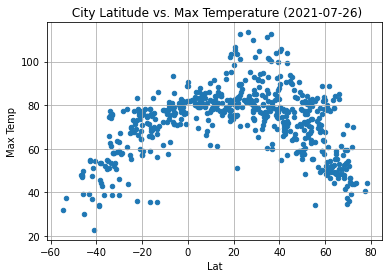

In [7]:
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp', 
                       title=f' City Latitude vs. Max Temperature ({today})')
plt.grid()
plt.savefig('fig1.png')

## Latitude vs. Humidity Plot

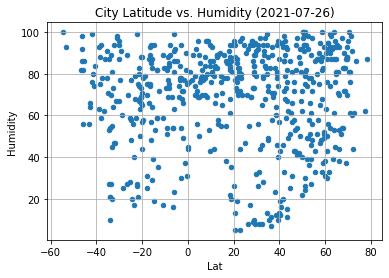

In [8]:
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity', title=f'City Latitude vs. Humidity ({today})')
plt.grid()
plt.savefig('fig2.png')

## Latitude vs. Cloudiness Plot

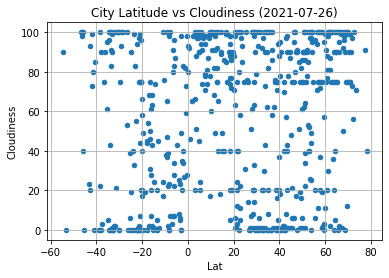

In [9]:
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness', title=f'City Latitude vs Cloudiness ({today})')
plt.grid()
plt.savefig('fig3.png')

## Latitude vs. Wind Speed Plot

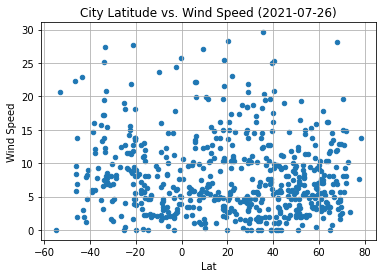

In [10]:
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed', title=f'City Latitude vs. Wind Speed ({today})')
plt.grid()
plt.savefig('fig4.png')

## Linear Regression

In [11]:
north_hem_df = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_hem_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.5809432720027031


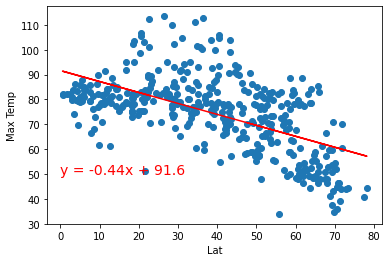

In [12]:
north_hem_df.plot(kind='scatter', x='Lat', y='Max Temp',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Max Temp'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem_df['Lat'], north_hem_df['Max Temp'])
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq, (0, 50),fontsize=14,color="red")

print(f'The r-value is {rvalue}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7403697974218805


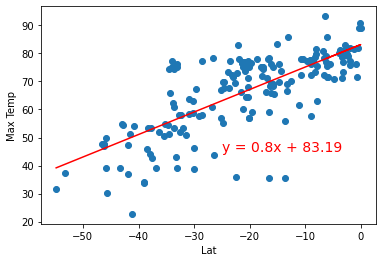

In [13]:
south_hem_df.plot(kind='scatter', x='Lat', y='Max Temp',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Max Temp'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem_df['Lat'], south_hem_df['Max Temp'])
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=14,color="red")


print(f'The r-value is {rvalue}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.03521956510263153


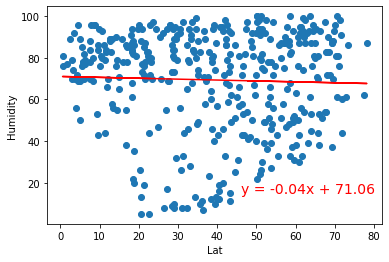

In [14]:
north_hem_df.plot(kind='scatter', x='Lat', y='Humidity',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Humidity'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem_df['Lat'], north_hem_df['Humidity'])
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")


print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.07859121898100835


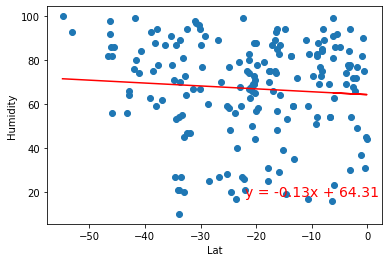

In [15]:
south_hem_df.plot(kind='scatter', x='Lat', y='Humidity',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Humidity'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem_df['Lat'], south_hem_df['Humidity'])
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")


print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.019701862838769915


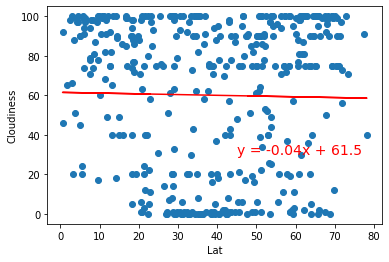

In [16]:
north_hem_df.plot(kind='scatter', x='Lat', y='Cloudiness',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Cloudiness'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem_df['Lat'], north_hem_df['Cloudiness'])
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")


print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.14254940346889156


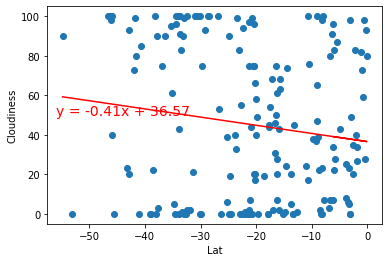

In [17]:
south_hem_df.plot(kind='scatter', x='Lat', y='Cloudiness',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Cloudiness'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem_df['Lat'], south_hem_df['Cloudiness'])
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")


print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.07825190603839494


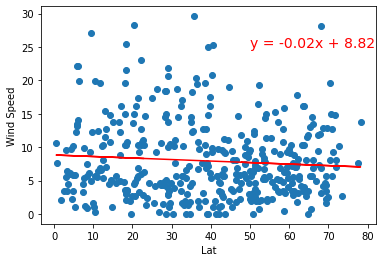

In [18]:
north_hem_df.plot(kind='scatter', x='Lat', y='Wind Speed',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Wind Speed'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem_df['Lat'], north_hem_df['Wind Speed'])
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=14,color="red")


print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.20701281117911846


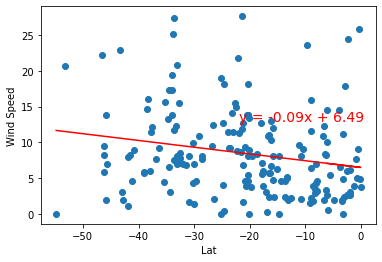

In [19]:
south_hem_df.plot(kind='scatter', x='Lat', y='Wind Speed',)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Wind Speed'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem_df['Lat'], south_hem_df['Wind Speed'])
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")


print(f'The r-value is {rvalue}')